https://archive.ics.uci.edu/ml/datasets/Adult

Abstract: Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset.

## Data Set Information:

Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))

Prediction task is to determine whether a person makes over 50K a year.

## Attribute Information:

Listing of attributes:

    >50K, <=50K.

age: continuous.
workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
fnlwgt: continuous.
education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
education-num: continuous.
marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
sex: Female, Male.
capital-gain: continuous.
capital-loss: continuous.
hours-per-week: continuous.
native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [1]:
# Loading libraries
import pandas as pd
import numpy as np

In [2]:
# Global variables and constants
DATA_FILENAME = 'adult.data'
TEST_FILENAME = 'adult.test'
COLUMNS = ['age', 'workclass','fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

In [3]:
# Loading data
data = pd.read_csv(DATA_FILENAME, index_col = False, names=COLUMNS)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


In [5]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,32561,38.581647,13.640433,17,28,37,48,90
fnlwgt,32561,189778.366512,105549.977697,12285,117827,178356,237051,1484705
education-num,32561,10.080679,2.572720,1,9,10,12,16
capital-gain,32561,1077.648844,7385.292085,0,0,0,0,99999
capital-loss,32561,87.303830,402.960219,0,0,0,0,4356
hours-per-week,32561,40.437456,12.347429,1,40,40,45,99


In [6]:
data.iloc[0:2, :]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [7]:
test = pd.read_csv(TEST_FILENAME, index_col = False, names=COLUMNS, skiprows=1)

In [8]:
test.iloc[0:2, :]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.


In [9]:
def label_encoding(data):
    from sklearn.preprocessing import LabelEncoder
    lbl = LabelEncoder()
    for col in data.columns:
        if data[col].dtype == 'object':
            lbl.fit(np.unique(data[col]))
            data[col] = lbl.transform(data[col])
    return data

In [10]:
data = label_encoding(data)

In [11]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,32561,38.581647,13.640433,17,28,37,48,90
workclass,32561,3.868892,1.455960,0,4,4,4,8
fnlwgt,32561,189778.366512,105549.977697,12285,117827,178356,237051,1484705
education,32561,10.298210,3.870264,0,9,11,12,15
education-num,32561,10.080679,2.572720,1,9,10,12,16
marital-status,32561,2.611836,1.506222,0,2,2,4,6
occupation,32561,6.572740,4.228857,0,3,7,10,14
relationship,32561,1.446362,1.606771,0,0,1,3,5
race,32561,3.665858,0.848806,0,4,4,4,4
sex,32561,0.669205,0.470506,0,0,1,1,1


In [12]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100)

In [13]:
clf.fit(data.iloc[:,:-1], data.iloc[:, -1])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [14]:
test = label_encoding(test)

In [15]:
test.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,16281,38.767459,13.849187,17,28,37,48,90
workclass,16281,3.873534,1.480682,0,4,4,4,8
fnlwgt,16281,189435.677784,105714.907671,13492,116736,177831,238384,1490400
education,16281,10.268841,3.882980,0,9,11,12,15
education-num,16281,10.072907,2.567545,1,9,10,12,16
marital-status,16281,2.632578,1.510611,0,2,2,4,6
occupation,16281,6.587617,4.233925,0,3,7,10,14
relationship,16281,1.437135,1.592903,0,0,1,3,5
race,16281,3.672440,0.840327,0,4,4,4,4
sex,16281,0.667035,0.471289,0,0,1,1,1


In [16]:
clf.score(test.iloc[:,:-1], test.iloc[:, -1])

0.85467723112830907

In [17]:
test['predictions'] = clf.predict(test.iloc[:,:-1])

In [18]:
test[['income', 'predictions']]

,income,predictions
0,0,0
1,0,0
2,1,1
3,1,1
4,0,0
5,0,0
6,0,0
7,1,1
8,0,0
9,0,0


In [19]:
clf.feature_importances_

array([ 0.14745595,  0.03943594,  0.17205316,  0.03109776,  0.0966839 ,
        0.06075821,  0.06617048,  0.11676611,  0.01374507,  0.01029583,
        0.11083581,  0.03366076,  0.08406848,  0.01697255])

In [20]:
feature_importances = dict(zip(list(data.columns), clf.feature_importances_))

In [21]:
feature_importances

{'age': 0.14745594673194862,
 'capital-gain': 0.11083580899253111,
 'capital-loss': 0.033660761707700181,
 'education': 0.031097758068704642,
 'education-num': 0.09668390283543607,
 'fnlwgt': 0.17205315767771512,
 'hours-per-week': 0.084068475482616645,
 'marital-status': 0.060758207386608865,
 'native-country': 0.016972552860191236,
 'occupation': 0.06617047739777468,
 'race': 0.013745070334533142,
 'relationship': 0.11676610703999264,
 'sex': 0.010295833487036762,
 'workclass': 0.039435939997210318}

In [22]:
feature_importances = pd.DataFrame(data=feature_importances.items(), columns =['feature', 'importance'])

In [23]:
feature_importances.sort_values(by=['importance'], ascending=False)

,feature,importance
11,fnlwgt,0.172053
2,age,0.147456
1,relationship,0.116766
3,capital-gain,0.110836
8,education-num,0.096684
5,hours-per-week,0.084068
13,occupation,0.066170
12,marital-status,0.060758
0,workclass,0.039436
9,capital-loss,0.033661


In [24]:
from sklearn.metrics import accuracy_score

In [25]:
accuracy_score(test['income'], test['predictions'])

0.85467723112830907

In [26]:
from sklearn.cluster import KMeans
cluster = KMeans(n_clusters = 2)

In [27]:
cluster.fit(data.iloc[:,:-1], data.iloc[:, -1])

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=2, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [28]:
cluster.labels_

array([0, 0, 0, ..., 0, 0, 1], dtype=int32)

In [29]:
cluster.cluster_centers_

array([[  3.91416725e+01,   3.87544866e+00,   1.42345706e+05,
          1.03598746e+01,   1.01427452e+01,   2.58867940e+00,
          6.55480837e+00,   1.44911094e+00,   3.68187632e+00,
          6.59268122e-01,   1.08800573e+03,   8.95442469e+01,
          4.04996493e+01,   3.68799868e+01],
       [  3.69504927e+01,   3.84979572e+00,   3.27932688e+05,
          1.01186013e+01,   9.89990387e+00,   2.67928383e+00,
          6.62496996e+00,   1.43835616e+00,   3.61920211e+00,
          6.98149483e-01,   1.04748294e+03,   8.07782985e+01,
          4.02563086e+01,   3.62495794e+01]])

In [30]:
len(cluster.labels_)

32561

In [31]:
x_cols = test.columns[0:-2]
test['cluster'] = cluster.predict(test[x_cols])

/home/gustavo/.local/lib/python2.7/site-packages/sklearn/cluster/k_means_.py:862: RuntimeWarning: Got data type int64, converted to float to avoid overflows
  X = self._check_test_data(X)


In [32]:
accuracy_score(test['income'], test['cluster'])

0.62569866715803701

In [33]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [34]:
test['X'] = pca.fit_transform(test[x_cols])[:, 0]
test['y'] = pca.fit_transform(test[x_cols])[:, 1]

In [35]:
from ggplot import *
%matplotlib inline

/usr/lib/pymodules/python2.7/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


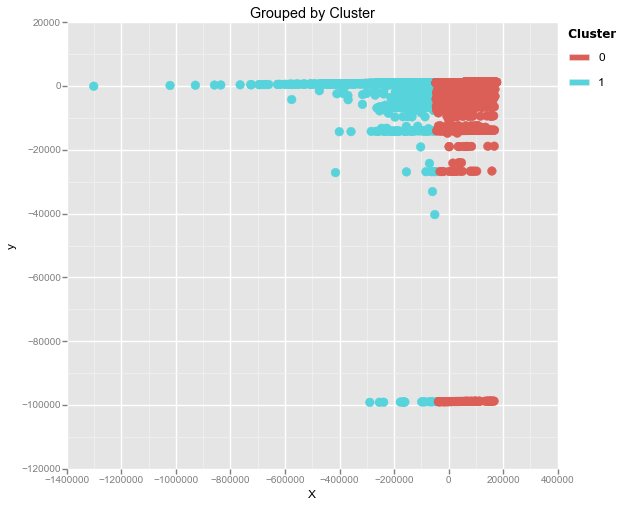

<ggplot: (8791841783281)>

In [36]:
ggplot(test, aes(x='X', y='y', color='cluster')) + \
    geom_point(size=75) + \
    ggtitle("Grouped by Cluster")